# WordCloud

In [1]:
!pip install konlpy
import re                  # RegEx
import konlpy
import pandas as pd

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('C:/Users/enigma/Documents/DSL/기초 세션/05-Visualization/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [3]:
text

# 잘 불러온 것을 확인!

['대출금리도 2.72% 사상최저\n',
 '\n',
 '\n',
 '\n',
 '\t\t\t\t은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다.\n',
 '\n',
 "한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다.\n",
 '\n',
 '대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다.\n',
 '\n',
 '신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다.\n',
 '\n',
 '한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다.\n',
 '\n',
 "시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억

In [4]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거

p = re.compile(r'\bclass\b')   # \b: blank (단어의 시작과 끝?)
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join) # 특수문자 제거
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기

okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

# No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.
# 이 Error 해결하느라 오래 걸렸습니다...

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

In [5]:
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

In [6]:
!pip install wordcloud

# wordcloud를 설치하는 과정에서 오류가 발생했었는데
# 지금은 해결됐습니다
# Visual C++ 14.0 설치 관련이었던 것 같습니다

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [8]:
# 나눔폰트는 원래 컴퓨터에 설치되어 있어서 font_path만 저장하겠습니다
import matplotlib.font_manager as fm

path = 'C:\\Users\\enigma\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundB.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquareRound


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

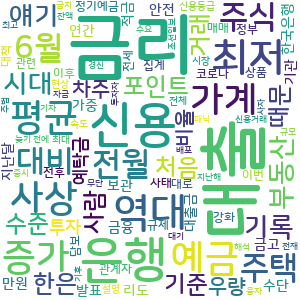

In [9]:
wordcloud = WordCloud(
    max_font_size = 70,
    width = 300,
    height = 300,
    font_path = path,
    relative_scaling = 'auto',
    background_color = 'white')

wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [10]:
train = pd.read_csv("C:/Users/enigma/Documents/DSL/기초 세션/05-Visualization/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [11]:
train['datetime'] = pd.to_datetime(train['datetime'])

# .dt 가 인식할 수 있도록 datetime 형태로 값을 바꿔 준다

In [12]:
train['year'] = train['datetime'].dt.year
train.head()

# 맨 끝쪽에 year 열이 추가된 것을 확인할 수 있다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [13]:
train['month'] = train['datetime'].dt.month
train.head()

# month 추가 - 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


In [15]:
train['day'] = train['datetime'].dt.day
train.head()

# day 추가 - 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [16]:
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

# hour, minute, second 추가 및 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [17]:
train['weekday'] = train['datetime'].dt.weekday
train.head()

# 요일이 숫자로 표기된다

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [18]:
train['weekday'].replace(0, 'Monday', inplace=True)
train['weekday'].replace(1, 'Tuesday', inplace=True)
train['weekday'].replace(2, 'Wednesday', inplace=True)
train['weekday'].replace(3, 'Thursday', inplace=True)
train['weekday'].replace(4, 'Friday', inplace=True)
train['weekday'].replace(5, 'Saturday', inplace=True)
train['weekday'].replace(6, 'Sunday', inplace=True)

train.head()

# 'weekday' 열의 값을 모두 요일별 이름으로 바꿨습니다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [19]:
train['year'].unique()

# 2011년과 2012년의 data가 있다

array([2011, 2012], dtype=int64)

In [20]:
train[train['year'] == 2011]

# 5422개의 row는 2011년의 data임을 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,2011-12-19 19:00:00,4,0,1,2,14.76,17.425,53,11.0014,17,234,251,2011,12,19,19,0,0,Monday
5418,2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9,197,206,2011,12,19,20,0,0,Monday
5419,2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15,112,127,2011,12,19,21,0,0,Monday
5420,2011-12-19 22:00:00,4,0,1,2,14.76,17.425,57,11.0014,12,95,107,2011,12,19,22,0,0,Monday


In [21]:
count_11 = train.iloc[0:5422, 11].sum()

# count: number of total rentals 이므로 count열의 값들을 가져와 모두 더한다
# 즉, 2011년에는 총 781,979건의 대여가 있었다

In [22]:
count_12 = train.iloc[5422:, 11].sum()

# 2012년에 해당하는 row들에서 count열의 값들을 가져와 모두 더한다
# 2012년에는 총 1,303,497건의 대여가 있었다

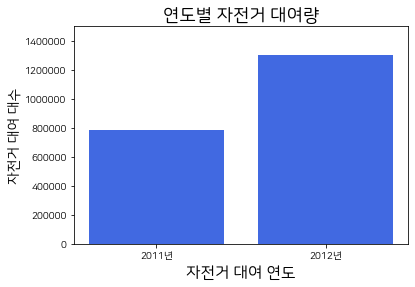

In [23]:
plt.bar(x = ['2011년', '2012년'],
        height = [count_11, count_12],
        color = 'royalblue'
       )
plt.ylim([0, 1500000])
plt.title("연도별 자전거 대여량", fontsize=18)
plt.xlabel("자전거 대여 연도", fontsize=16)
plt.ylabel("자전거 대여 대수", fontsize=14)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # y축의 scientific notation을 없앴습니다
plt.show()

In [24]:
# 2011년보다 2012년에 자전거 대여량이 월등히 높아졌음을 확인할 수 있습니다.
# 월별 그래프를 통해 좀 더 자세히 확인해 보도록 합니다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [25]:
train[(train['year'] == 2011) & (train['month'] == 1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,2011,1,19,19,0,0,Wednesday
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,2011,1,19,20,0,0,Wednesday
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011,1,19,21,0,0,Wednesday
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011,1,19,22,0,0,Wednesday


In [26]:
record = []

for year in [2011, 2012]:
    for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        train_temp = train[(train['year'] == year) & (train['month'] == month)]
        record.append(train_temp.iloc[:, 11].sum())
        
print(record)

# 2011.1 ~ 2012.12까지의 월별 총 자전거 대여 대수를 record list에 기록했습니다

[23552, 32844, 38735, 50517, 79713, 89776, 92848, 83296, 79104, 79522, 70889, 61183, 56332, 66269, 94766, 116885, 120434, 130957, 121769, 130220, 133425, 127912, 105551, 98977]


In [27]:
import math

In [28]:
plt.rcParams["figure.figsize"] = (25,8)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=14) 

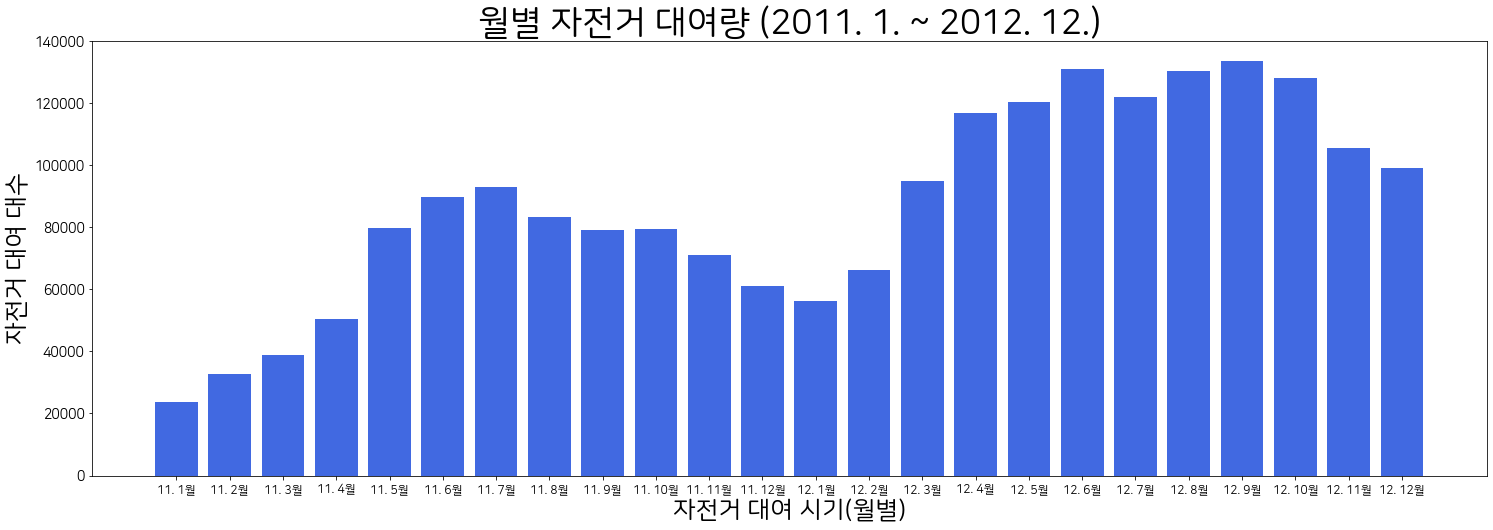

In [29]:
x = []

for year in [11, 12]:
    for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        temp = "{0}. {1}월".format(year, month)
        x.append(temp)

plt.bar(x = x,
        height = record,
        color = 'royalblue'
       )
plt.ylim([0, 140000])
plt.title("월별 자전거 대여량 (2011. 1. ~ 2012. 12.)", fontsize=35)
plt.xlabel("자전거 대여 시기(월별)", fontsize=25)
plt.ylabel("자전거 대여 대수", fontsize=25)

plt.show()

In [30]:
# 2011년 1월~4월까지는 대여량이 저조하다가,
# 2011년 5월부터 대여량이 급상승, 2011년 7월에 정점
# 2011년 10월까지 비슷한 수준을 유지하다가
# 2011년 11월부터 하락하기 시작해 2012년 2월까지 낮은 수준을 보임
# 2012년 3월에 다시 대여량이 늘고
# 2012년 4월부터 10월까지 월 10만대 이상의 대여량으로 최고 수준을 기록
# 2012년 11월부터는 다시 주춤

# 자전거 대여량이기 때문에 계절의 영향을 받는 것으로 추측할 수 있다.
# 날씨가 추운 겨울철 (11월 ~ 그다음해 2~3월)에는 대여량이 적고,
# 날씨가 따뜻한 봄~여름철, 특히 5월부터 10월까지의 대여량이 높음을 확인할 수 있었다.

In [31]:
record_year_difference = []
for i in range(0, 12):
    record_year_difference.append(record[i+12] - record[i])

record_year_difference

# 2012년 월별 대여량에서 2011년 월별 대여량을 뺀 값을 구해 보았다

[32780,
 33425,
 56031,
 66368,
 40721,
 41181,
 28921,
 46924,
 54321,
 48390,
 34662,
 37794]

Text(0, 0.5, '자전거 대여 대수')

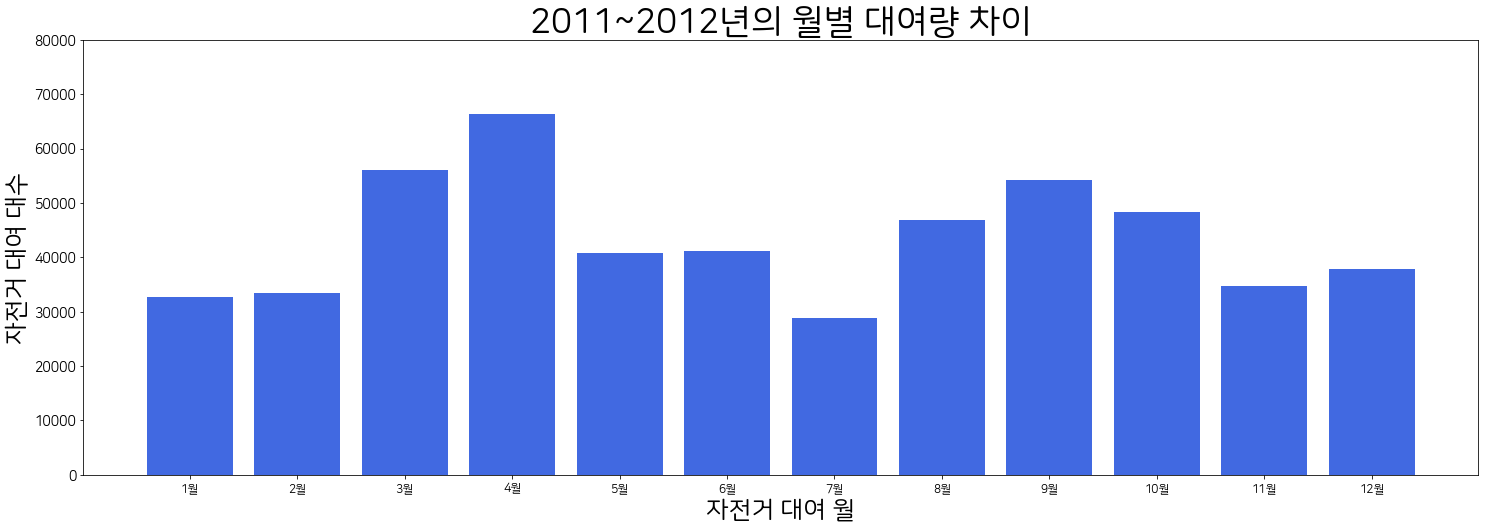

In [32]:
plt.bar(x = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'],
        height = record_year_difference,
        color = 'royalblue'
       )
plt.ylim([0, 80000])
plt.title("2011~2012년의 월별 대여량 차이", fontsize=35)
plt.xlabel("자전거 대여 월", fontsize=25)
plt.ylabel("자전거 대여 대수", fontsize=25)

In [33]:
# 2011년과 2012년의 동월 대여량을 비교해 보면,
# 1월부터 12월까지 모든 달의 대여량이 최소 25,000대 이상 증가한 것을 알 수 있다
# 2012년의 기온이 2011년보다 따뜻했을 수도 있고,
# 기업의 마케팅 전략이 성공을 거둔 것일 수도 있겠다.

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [34]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='hour', ylabel='count'>

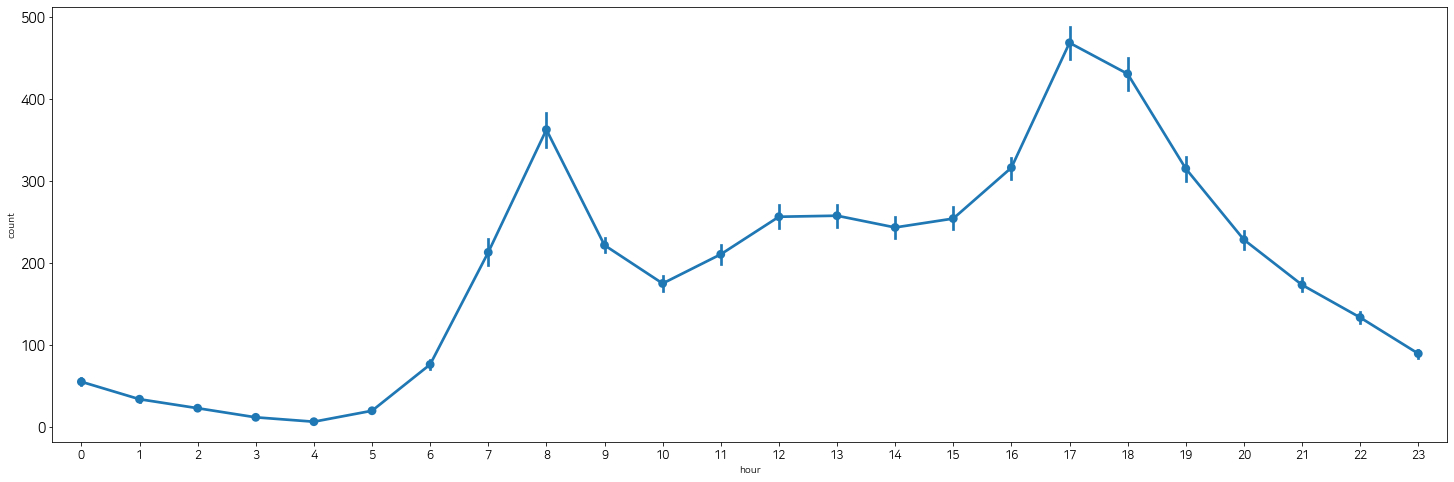

In [37]:
# 1) 시간별 자전거 대여량 visualization

sns.pointplot(data = train,
             x = 'hour',
             y = 'count')

# 오전 8시와 오후 5~6시가 대여량이 가장 많음을 알 수 있다.
# 출퇴근 시간에 활용하기 위해 자전거를 대여하기 때문으로 추측해 본다.

<AxesSubplot:xlabel='hour', ylabel='count'>

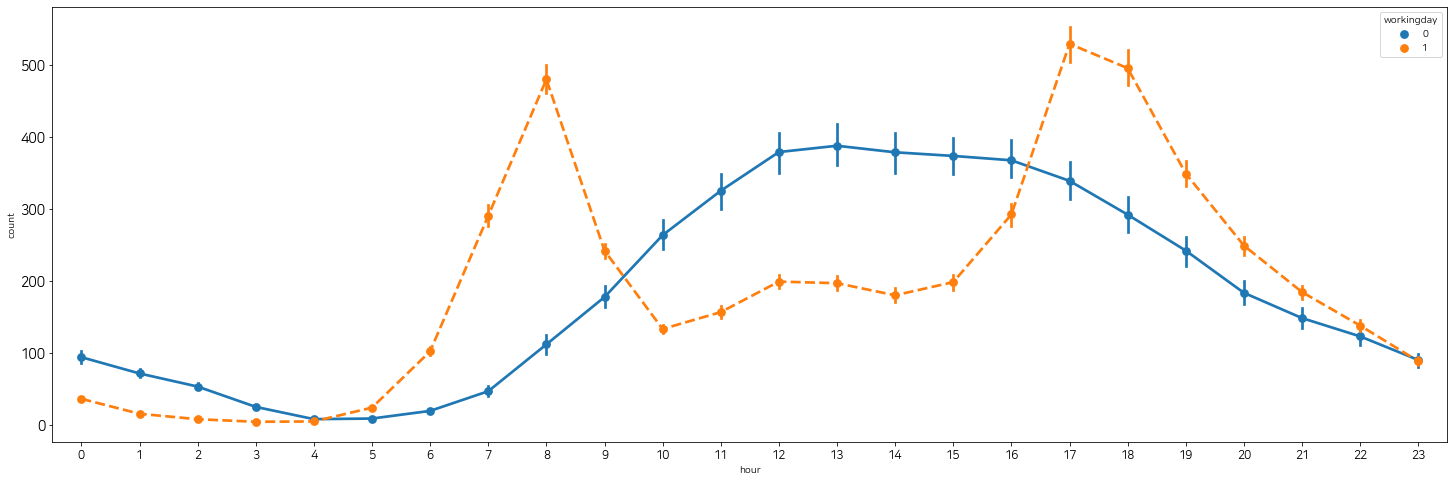

In [48]:
# 2) 근무일/휴일에 따른 시간별 자전거 대여량
# 근무일인지 아닌지는 'workingday' column에서 확인할 수 있으므로
# 이를 hue 변수에 추가해 그래프를 분리해 본다

sns.pointplot(data = train,
             x = 'hour',
             y = 'count',
             hue = 'workingday',
             linestyles = ['-', '--'],)

# 주황색(근무일) 그래프에서는 1)에서와 마찬가지로 오전 8시, 오후 5~6시의 대여량이 폭발적
# 파란색(휴일) 그래프에서는 그렇지 않고, 낮시간대에 완만하게 높아지는 모양
# 8시와 17~18시의 대여량 증가는 출퇴근에 의한 자전거 수요 증가가 원인이라는 것이 더 강하게 입증됨

<AxesSubplot:xlabel='hour', ylabel='count'>

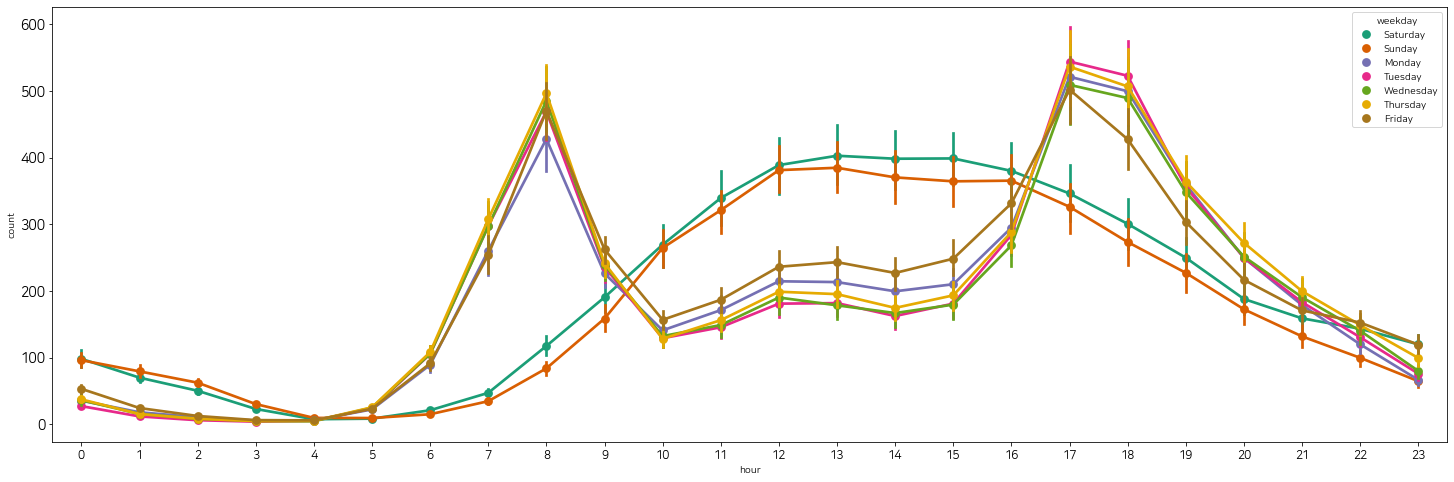

In [53]:
# 3) 요일에 따른 시간대별 자전거 대여량 확인하기
# 'weekday' 열에 요일을 명시했으므로 이를 hue 변수에 활용할 수 있다

sns.pointplot(data = train,
             x = 'hour',
             y = 'count',
             hue = 'weekday',
             palette = 'Dark2')

# 토요일+일요일, 월요일~금요일의 그래프 형태가 확연히 구분됨을 재확인한다
# 금요일은 18시 대여량이 월~목요일보다 조금 낮다. 금요일은 퇴근 시간이 조금 더 빠른 것 같다.

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [54]:
# mpg data set

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

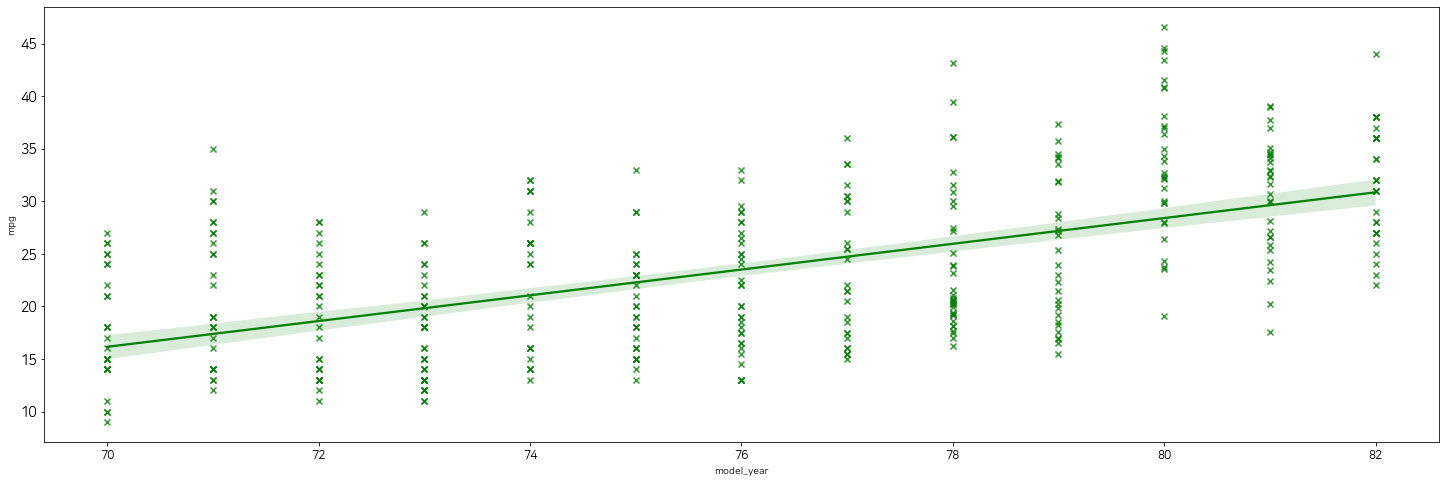

In [57]:
sns.regplot(data = mpg,
           x = 'model_year', y = 'mpg', marker = 'x', color = 'g')

# model_year와 mpg는 양의 상관관계를 보임을 시각적으로 확인한다
# 최근에 나온 차종일수록, 연비가 대체로 좋음을 의미한다.

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
